In [500]:
import requests

import datetime
import os
import json
from matplotlib import pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

# Christmas movies from the TMDB

Data from The Movie Database API. This will consider only movies in the English language.

# Setups

In [724]:
plt.style.use('ggplot')

In [95]:
# API key has been stored as env var
API_KEY = os.environ["TMDB_API_KEY"]

In [551]:
base_url = "https://api.themoviedb.org/3/"

# Just try out the key/try a movie

this is so I can get the keyword I need by ID as the movie discover endpoint works off of a keyword ID. I've taken the movie ID directly from TMDB (in the URL when you look on a movie page). Keyword is "christmas"

In [648]:
# this is "The Grinch"

url = base_url + "/movie/145312?api_key=" + API_KEY

In [649]:
response = requests.get(url)

In [650]:
response.json()

{'adult': False,
 'backdrop_path': '/g64HuM27YMGpgTsKmrHbk9COQuX.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 10751, 'name': 'Family'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 10770, 'name': 'TV Movie'}],
 'homepage': '',
 'id': 145312,
 'imdb_id': 'tt1893218',
 'original_language': 'en',
 'original_title': 'Dear Santa',
 'overview': "Crystal, a rich party girl, finds a little girl's letter to Santa asking for a new mother, and she vows to win over the father and daughter before the holidays.",
 'popularity': 5.323,
 'poster_path': '/18UnDP6ficSVzWKVflhh6ebjftJ.jpg',
 'production_companies': [{'id': 12467,
   'logo_path': None,
   'name': 'Nomadic Pictures',
   'origin_country': 'CA'},
  {'id': 21040,
   'logo_path': '/d9oN0WNidszq5epSGKGsnn6DyDN.png',
   'name': 'ITV Studios America',
   'origin_country': 'US'},
  {'id': 21041,
   'logo_path': None,
   'name': 'Annuit Coeptis Entertainment In

In [108]:
url = base_url + "/movie/360920/keywords?api_key=" + API_KEY

In [109]:
response = requests.get(url)
response.json()

{'id': 360920,
 'keywords': [{'id': 9714, 'name': 'remake'},
  {'id': 9887, 'name': 'surrealism'},
  {'id': 15101, 'name': "based on children's book"},
  {'id': 207317, 'name': 'christmas'}]}

# Fetch movies by keyword

year by year. Keyword is "christmas" (by ID)

In [526]:
# here, try to figure out how many pages of results there are
# I don't seem to find a better way (specific endpoint) as not using the page
# query param gives the first page only

page = 10
year = 2022

url = base_url + "/discover/movie?api_key=" + API_KEY + \
                 "&language=en-US"
                 "&with_keywords=207317" + \
                 "&primary_release_year=" + str(year) + \
                 "&page=" + str(page)

url

response = requests.get(url)

'https://api.themoviedb.org/3//discover/movie?api_key=7ec3cdd215edb57c63bef8687d730960&with_keywords=207317&primary_release_year=2022&page=10'

In [527]:
len(response.json()['results'])

0

In [217]:
# reporting here max page I found for each year that has movies
# 2022: 8 - it may be not completed at this stage (year not finished yet!)
# 2021: 9
# 2020: 8
# 2019: 7
# 2018: 8
# 2017: 6
# 2016: 5
# 2015: 5
# 2014: 5
# 2013: 4
# 2012: 4
# 2011: 4
# 2010: 3

In [565]:
d_year = {}

In [677]:
year = 2022

d_year[year] = {}

for page in range(1, 100):   

    print(page)

    url = base_url + "/discover/movie?api_key=" + API_KEY + \
                     "&with_original_language=en" + \
                     "&with_keywords=207317" + \
                     "&primary_release_year=" + str(year) + \
                     "&page=" + str(page)

    response = requests.get(url)
    if response.status_code != 200 or len(response.json()['results'])==0:
        break
        
    d_year[year][page] = response.json()['results']

1
2
3
4
5
6
7
8
9


In [678]:
d_year.keys()

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [581]:
response.status_code==200

True

# Analyse!

In [679]:
d_year[2022][1][0]

{'adult': False,
 'backdrop_path': '/2T92w8l2iTnyG9jwOmIWfM9thRV.jpg',
 'genre_ids': [16, 10751, 12],
 'id': 1045944,
 'original_language': 'en',
 'original_title': 'The Boss Baby: Christmas Bonus',
 'overview': "Christmas Eve takes a twisty turn when the Boss Baby accidentally swaps places with one of Santa's elves and gets stranded at the North Pole.",
 'popularity': 1573.095,
 'poster_path': '/iMmMxF6f2OonUrXrHKBLSYAhXly.jpg',
 'release_date': '2022-12-06',
 'title': 'The Boss Baby: Christmas Bonus',
 'video': False,
 'vote_average': 6.6,
 'vote_count': 77}

In [680]:
# tot movies

sum([len(d_year[year][page]) for year in range(2010, 2022) for page in d_year[year]])

1121

## Look at all release dates

This is to see if I have to exclude movies not released in December

In [681]:
release_date[:-2]

'2022-10-'

In [682]:
release_months = {}
for year in range(2013, 2021):
    for page in d_year[year]:
        for film in d_year[year][page]:
            # truncate manually
            release_month = film['release_date'][:-2]
            if release_month not in release_months:
                release_months[release_month] = 1
            else:
                release_months[release_month] += 1

In [683]:
x = sorted(release_months)
y = [release_months[k] for k in x]

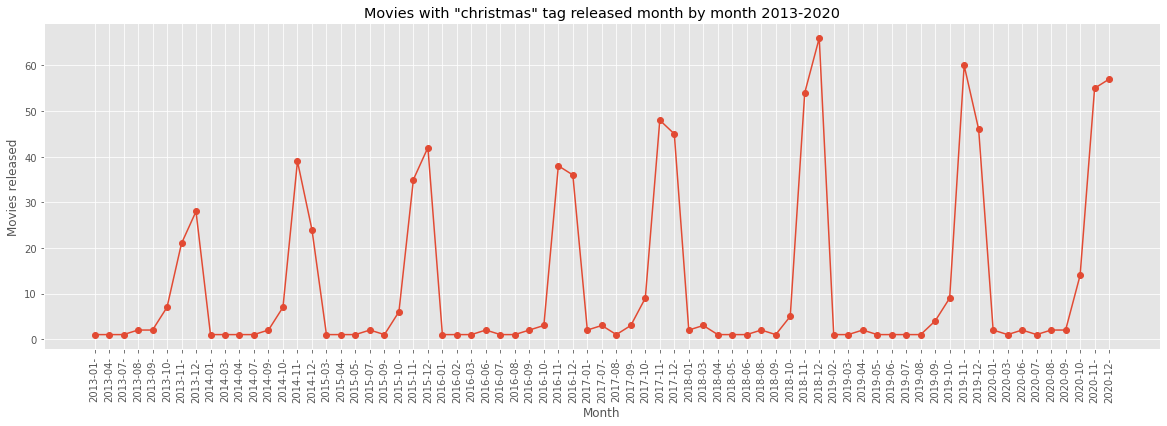

In [684]:
plt.figure(figsize=(20, 6))

plt.plot(x, y, marker='o');

plt.xlabel('Month');
plt.ylabel('Movies released')
plt.title('Movies with "christmas" tag released month by month 2013-2020')
#plt.xticks(['2010-01', '2011-01', '2012-01'], ['Jan 2010', 'Jan 2011', 'Jan 2012'], rotation=90);
plt.xticks( rotation=90);

plt.savefig('movies-month.jpg', bbox_inches='tight');

The peaks are decembers, so apart from a few it does look like the vast majority of films is released in december, which is what we want. The minority outside of xmastime won't matter much. Notice how peaks increase in time, which means more movies are released year by year!

## Count of movies by year

In [685]:
x = range(2010, 2023)
y = []
for year in x:
    count = 0
    for page in d_year[year]:
#        print(year, page, len(d_year[year][page]))
        count += len(d_year[year][page])
    y.append(count)

<BarContainer object of 13 artists>

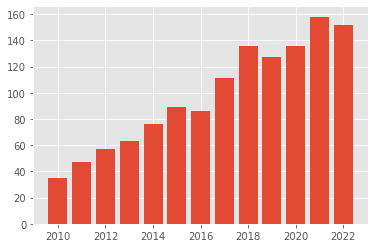

In [686]:
plt.bar(x, y)

In [687]:
y

[35, 47, 57, 63, 76, 89, 86, 111, 136, 127, 136, 158, 152]

## Which christmas-tagged movies are released outside of December/November?

I'm adding November as I've noticed many real Christmas one come out maybe late November

In [688]:
nondec_titles = []
for year in d_year:
    for page in d_year[year]:
        for film in d_year[year][page]:
            if film['release_date'].split('-')[1] not in ['12', '11']:
                print(film['original_title'], film['release_date'])
                nondec_titles.append(film['original_title'])

The Search for Santa Paws 2010-10-12
Conviction 2010-10-15
The Traveler 2010-10-01
A Christmas Snow 2010-10-08
The Santa Incident 2010-01-01
Tim and Eric Awesome Show, Great Job! Chrimbus Special 2010-10-22
The Most Wonderful Time of the Year Featuring Natalie Cole 2010-09-07
Christmas Lodge 2011-10-11
Dear Santa 2011-08-11
November Christmas 2011-06-21
The Confession 2011-07-01
Head Over Spurs in Love 2011-03-24
Becoming Santa 2011-03-12
The Melancholy Fantastic 2011-08-18
Grantræet 2011-04-30
Hercules Saves Christmas 2011-01-01
Santa Vs Zombies 2011-07-28
Andy and Zach 2011-01-24
Knifepoint 2011-07-16
Scooby-Doo! Haunted Holidays 2012-10-16
A Christmas Story 2 2012-09-06
Abominable Christmas 2012-10-23
Christmas Miracle 2012-10-12
12 Dogs of Christmas: Great Puppy Rescue 2012-10-09
The Fitzgerald Family Christmas 2012-09-09
Ira Finkelstein's Christmas 2012-04-01
Violent Night: The Movie 2012-04-21
Christmas Oranges 2012-06-01
Christmas Eve '45 2012-10-13
Saint Street 2012-01-01
The O

In [689]:
nondec_titles[:10]

['The Search for Santa Paws',
 'Conviction',
 'The Traveler',
 'A Christmas Snow',
 'The Santa Incident',
 'Tim and Eric Awesome Show, Great Job! Chrimbus Special',
 'The Most Wonderful Time of the Year Featuring Natalie Cole',
 'Christmas Lodge',
 'Dear Santa',
 'November Christmas']

It looks like there's several which look like genuine xmas ones released even before November! I will leave things as is (won't exclude based on month of release).

In [690]:
d_year[2022][8]

[{'adult': False,
  'backdrop_path': None,
  'genre_ids': [18, 10751],
  'id': 1034042,
  'original_language': 'en',
  'original_title': 'A Wesley Christmas',
  'overview': 'Adult siblings Chris, Todd, and Cydney Wesley travel to their childhood home to celebrate Christmas with their parents and the entire Wesley family. With everyone together and all their physical and emotional baggage in tow, the annual Wesley family holiday promises to be a festive, hot-mess of a Christmas with life-changing impacts on the whole family.',
  'popularity': 1.96,
  'poster_path': '/bmmKNaKpEKMPdfs1iB9ciIMGhBH.jpg',
  'release_date': '2022-11-03',
  'title': 'A Wesley Christmas',
  'video': False,
  'vote_average': 6,
  'vote_count': 1},
 {'adult': False,
  'backdrop_path': '/d8KfZG711doMTs6p25tO3T5zoi1.jpg',
  'genre_ids': [35, 10749, 10751],
  'id': 1032464,
  'original_language': 'en',
  'original_title': 'All I Want For Christmas',
  'overview': 'A beloved Black mall Santa wants to find the perfect

## avg rating per year

To understand the ratings, I pulled a couple of movies and compared to the TMDB rating shown on the web page - the rating here is on a scale of 0-10, on website it's shown as %, e.g. 6.2 here and 62% there

In [716]:
# using the median as I'm pretty sure the dist is skewed
x = range(2010, 2023)
y = []

tot_ratings = []
for year in x:
    ratings = []
    for page in d_year[year]:
#        print(year, page, len(d_year[year][page]))
        for film in d_year[year][page]:
            if film['vote_count'] > 20:
                ratings.append(film['vote_average'])
    tot_ratings += ratings
    y.append(np.median(ratings))

<BarContainer object of 13 artists>

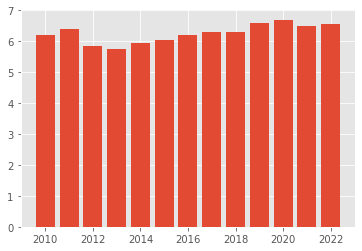

In [717]:
plt.bar(x,y)

In [723]:
len(tot_ratings), np.median(tot_ratings), np.mean(tot_ratings)

(495, 6.3, 6.210303030303031)

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,  11.,  19.,  40.,
         75.,  88., 107.,  94.,  34.,  15.,   4.,   1.,   2.]),
 array([1.9  , 2.235, 2.57 , 2.905, 3.24 , 3.575, 3.91 , 4.245, 4.58 ,
        4.915, 5.25 , 5.585, 5.92 , 6.255, 6.59 , 6.925, 7.26 , 7.595,
        7.93 , 8.265, 8.6  ]),
 <BarContainer object of 20 artists>)

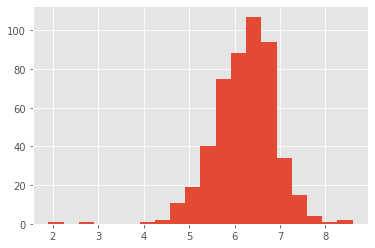

In [722]:
plt.hist(tot_ratings, bins=20)

it's actually not that skewed, mostly as I cut films with very little votes.

## How many votes?

And votes vs ratings too

In [693]:
votes, ratings = [],[]
for year in d_year.keys():
    for page in d_year[year]:
        for film in d_year[year][page]:
            votes.append(film['vote_count'])
            ratings.append(film['vote_average'])

In [694]:
np.mean(votes), np.median(votes), np.max(votes), np.min(votes)

(106.79968578161822, 13.0, 20124, 0)

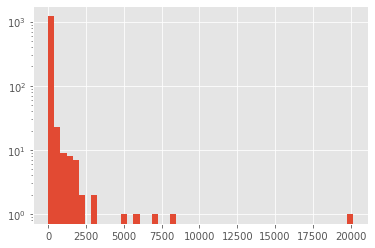

In [695]:
plt.hist(votes, bins=50, log=True);

In [696]:
np.corrcoef(votes, ratings)

array([[1.        , 0.08314171],
       [0.08314171, 1.        ]])

[]

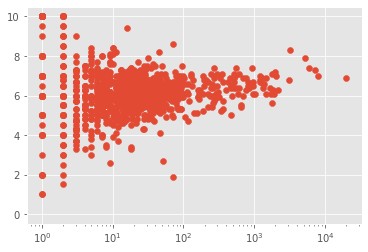

In [697]:
plt.scatter(votes, ratings)
plt.semilogx()
#plt.semilogy()

this was just to check if more ratings bring a higher score - not really the case

In [698]:
# can derive who are these ones with many votes and a fairly high popularity
# or also who's that one with ~20000 votes (!)

votes, ratings = [], []
for year in d_year.keys():
    for page in d_year[year]:
        for film in d_year[year][page]:
            if film['vote_count'] > 100 and film['vote_average'] > 8:
                print(film['original_title'])
                
            if film['vote_count'] > 20000:
                print(film['original_title'])

Iron Man 3
Klaus


## Genres

In [699]:
url = "https://api.themoviedb.org/3/genre/movie/list?api_key=" + API_KEY

In [700]:
response = requests.get(url)
genres = {item['id']:item['name'] for item in response.json()['genres']}

genres

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [701]:
genre_counts = {}

for year in d_year:
    for page in d_year[year]:
        for film in d_year[year][page]:
            for genre_id in film['genre_ids']:                    
                try:
                    genre_counts[genres[genre_id]] += 1
                    #print('found it', genre_counts)
                except KeyError:
                    genre_counts[genres[genre_id]] = 1
                    #print('not found it')

In [702]:
genre_counts

{'Animation': 78,
 'Family': 373,
 'TV Movie': 727,
 'Comedy': 572,
 'Fantasy': 104,
 'Adventure': 34,
 'Drama': 395,
 'Romance': 643,
 'Horror': 72,
 'Thriller': 22,
 'Crime': 19,
 'Documentary': 38,
 'Music': 52,
 'Science Fiction': 13,
 'Mystery': 22,
 'Action': 17,
 'History': 9,
 'War': 1}

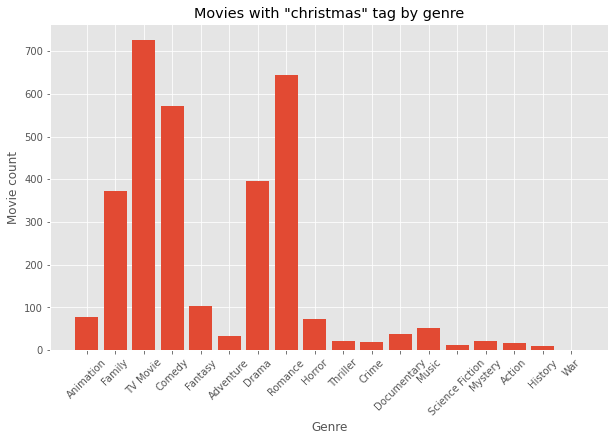

In [703]:
plt.figure(figsize=(10,6));
plt.xticks(rotation=45);

plt.title('Movies with "christmas" tag by genre');
plt.xlabel('Genre');
plt.ylabel('Movie count');
plt.bar(genre_counts.keys(), genre_counts.values());

plt.savefig('movies-by-genre.jpg', bbox_inches='tight');

In [704]:
genre_counts

{'Animation': 78,
 'Family': 373,
 'TV Movie': 727,
 'Comedy': 572,
 'Fantasy': 104,
 'Adventure': 34,
 'Drama': 395,
 'Romance': 643,
 'Horror': 72,
 'Thriller': 22,
 'Crime': 19,
 'Documentary': 38,
 'Music': 52,
 'Science Fiction': 13,
 'Mystery': 22,
 'Action': 17,
 'History': 9,
 'War': 1}

In [705]:
sum(genre_counts.values())

3191

In [706]:
# double check counts agree
c = 0
for year in d_year:
    for page in d_year[year]:
        c += sum([len(film['genre_ids']) for film in d_year[year][page]])
        
c

3191

In [707]:
[35, 18, 10749, 10770]

[35, 18, 10749, 10770]

In [708]:
# which one is the war one?
for year in d_year:
    for page in d_year[year]:
        for film in d_year[year][page]:
            if 10752 in film['genre_ids']:
                print(film)

{'adult': False, 'backdrop_path': None, 'genre_ids': [10770, 10752, 18, 10749], 'id': 369060, 'original_language': 'en', 'original_title': 'A Christmas Truce', 'overview': 'During a shaky 24-hour holiday truce amid the Battle of the Bulge, American Captain John Myers and a Belgian farm girl, Alina, fall in love. Forced to separate when fighting resumes, the couple vows to reunite, under a bell tower, the first Christmas Eve after the war ends, if each is alive and eager.', 'popularity': 2.341, 'poster_path': '/2vjC5Xt9JbYGUvestMn5SZduRs.jpg', 'release_date': '2015-12-10', 'title': 'A Christmas Truce', 'video': False, 'vote_average': 6.6, 'vote_count': 19}


## See how many movies get released in the last week of the year

In [709]:
c_lastofyear = {}
for year in d_year:
    c_lastofyear[year] = []
    for page in d_year[year]:
        for film in d_year[year][page]:
            if int(film['release_date'].split('-')[1]) == 12 and \
                int(film['release_date'].split('-')[2]) in range(25,32):
                c_lastofyear[year].append(film)

In [710]:
[(year, len(c_lastofyear[year])) for year in c_lastofyear]

[(2010, 0),
 (2011, 2),
 (2012, 1),
 (2013, 2),
 (2014, 1),
 (2015, 4),
 (2016, 3),
 (2017, 2),
 (2018, 3),
 (2019, 3),
 (2020, 4),
 (2021, 2),
 (2022, 1)]

## Best-rated movie every year

In [712]:
d_year_slim = {}
for year in d_year:
    d_year_slim[year] = []
    for page in d_year[year]:
        # still only keep the ones above a threshold in votes
        for film in d_year[year][page]:
            if film['vote_count'] > 20:
                d_year_slim[year].append((film['original_title'], film['vote_average'], film['original_language']))
               
for year in d_year_slim:
    print(year, sorted(d_year_slim[year], key=lambda tup: tup[1], reverse=True)[:2])

2010 [('A Heartland Christmas', 8.2, 'en'), ('Family Guy Presents: Road to the North Pole', 7.7, 'en')]
2011 [('November Christmas', 7.9, 'en'), ("Love's Christmas Journey", 7.2, 'en')]
2012 [('Scooby-Doo! Haunted Holidays', 8.6, 'en'), ('Abominable Christmas', 7.5, 'en')]
2013 [('Iron Man 3', 6.9, 'en'), ('Filth', 6.9, 'en')]
2014 [('Signed, Sealed, Delivered for Christmas', 7.1, 'en'), ('The Nine Lives of Christmas', 6.9, 'en')]
2015 [('Hector', 7.2, 'en'), ('The Spirit of Christmas', 7, 'en')]
2016 [('The Conjuring 2', 7.3, 'en'), ('A December Bride', 7.1, 'en')]
2017 [("Karen Kingsbury's Maggie's Christmas Miracle", 7.1, 'en'), ('With Love, Christmas', 7.1, 'en')]
2018 [('The Christmas Chronicles', 7.1, 'en'), ('Once Upon a Deadpool', 7.1, 'en')]
2019 [('Klaus', 8.3, 'en'), ('Little Women', 7.9, 'en')]
2020 [('High School Musical: The Musical: The Holiday Special', 7.5, 'en'), ('USS Christmas', 7.5, 'en')]
2021 [('A Boy Called Christmas', 7.4, 'en'), ('Boiling Point', 7.4, 'en')]
2

In [555]:
for page in d_year[2021]:
    for film in d_year[2021][page]:
        if film['original_title'] == 'La noche mágica':
            print(film)

{'adult': False, 'backdrop_path': '/1nXpJcGORp9mVLeaLO2r5ZrYIHb.jpg', 'genre_ids': [35, 80], 'id': 630520, 'original_language': 'es', 'original_title': 'La noche mágica', 'overview': 'A peaceful Christmas Eve is interrupted when a thief breaks into a villa. When the family’s little daughter mistakes him for Santa Claus and asks him to fulfill her Christmas wish, he will be forced to perform a miracle that will redeem secrets from the past.', 'popularity': 5.185, 'poster_path': '/bZrIS3l76RUTDKC8bugYfwJ1PlS.jpg', 'release_date': '2021-03-11', 'title': 'Bad Christmas', 'video': False, 'vote_average': 7.8, 'vote_count': 39}


## Persist the data

In [348]:
json.dump(d_year, open('xmas_movies.json', 'w'))

## Other notes

There are also things that aren't movies, striclt speaking, but maybe concerts/documentaries (e.g. The Most Wonderful Time of the Year Featuring Natalie Cole).

# Get non-Christmas movies for comparison

I want to compare the ratings. Also, I want to see if the trend in releases is a general one beyond just xmas. This would be lots of data to store locally so will only keep release date, title, rating and number of votes.

EDIT: can't really do this, the API only allows me to fetch up to 500 movies per year

In [352]:
d_year_all = {}

In [369]:
year = 2022

d_year_all[year] = {}

# this will pull based on 
for page in range(1, 1000):   

    url = base_url + "/discover/movie?api_key=" + API_KEY + \
                     "&primary_release_year=" + str(year) + \
                    "&page=" + str(page)

    response = requests.get(url)
    if response.status_code != 200:
        break
        
    if len(response.json()['results']) > 0:
        d_year_all[year][page] = [{'release_date': film['release_date'],
                                'original_title': film['original_title'],
                                 'vote_average': film['vote_average'],
                                 'voce_count': film['vote_count'] 
                                  } for film in response.json()['results']]
    else:
        break
        
    if page % 30 == 0:
        print(page)

30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480


In [370]:
## Persist this too

json.dump(d_year_all, open('all_movies_slim.json', 'w'))

In [372]:
d_year_all.keys()

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [380]:
d_year_all[2021].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [374]:
x = range(2010, 2023)
y = []
for year in x:
    count = 0
    for page in d_year_all[year]:
#        print(year, page, len(d_year[year][page]))
        count += len(d_year_all[year][page])
    y.append(count)

<BarContainer object of 13 artists>

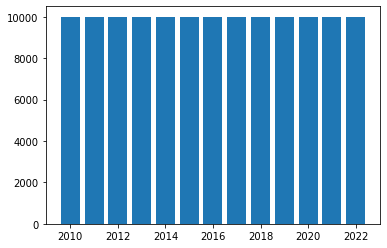

In [375]:
# not good, it's clearly capped
plt.bar(x,y)

In [398]:
x = range(2010, 2023)
y = []
for year in x:
    ratings = []
    for page in d_year_all[year]:
#        print(year, page, len(d_year[year][page]))
        for film in d_year_all[year][page]:
            if film['voce_count'] > 10:     # I did a typo :) 
                ratings.append(film['vote_average'])
    y.append(np.mean(ratings))

<BarContainer object of 13 artists>

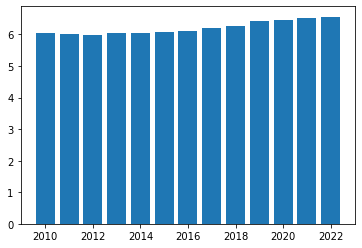

In [399]:
plt.bar(x,y)

Unfort it seems the API is capped to page 500, so I cannot to this?

Can maybe use these as a proxy 
* https://www.statista.com/statistics/187122/movie-releases-in-north-america-since-2001/
* https://stephenfollows.com/how-many-films-are-released-each-year/

In [395]:
d_year_all[2010][1][0]

{'release_date': '2010-02-07',
 'original_title': 'Avatar: Creating the World of Pandora',
 'vote_average': 7.4,
 'voce_count': 28}

In [419]:
d_year[2022][2][0]

{'adult': False,
 'backdrop_path': '/gNLMEf2lzJk9l7TlkJD3uQM2WuV.jpg',
 'genre_ids': [35, 18, 10749, 10770],
 'id': 1029208,
 'original_language': 'en',
 'original_title': 'This is Christmas',
 'overview': 'Follow Adam and Emma on their daily commute from the village of Langton to London, where they meet the same passengers every day. One morning, Adam breaks the unspoken taboo of talking to strangers on a train and invites the entire carriage to hold their own Christmas party together.',
 'popularity': 30.865,
 'poster_path': '/wDIIpxhkxhfV1TZraWYty8S6YU4.jpg',
 'release_date': '2022-12-09',
 'title': 'This is Christmas',
 'video': False,
 'vote_average': 0,
 'vote_count': 0}